# LEVEL2:BoWにTF-IDFで重み調整した特徴ベクトルを生成せよ

### 重要なモジュールをインポートする

In [6]:
import sklearn.feature_extraction.text as fe_text
import os
import nltk
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
import numpy as np
import glob
import scipy.spatial.distance as distance
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Bag-of-Words**によるベクトルを生成。

In [2]:
def bow(docs):
    vectorizer = fe_text.CountVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform(docs)
    return vectors.toarray(), vectorizer

**Bag-of-Words**に**TF-IDF**で重み調整したベクトルを生成

In [3]:
def bow_tfidf(docs):
    vectorizer = fe_text.TfidfVectorizer(norm=None, stop_words='english')
    vectors = vectorizer.fit_transform(docs)
    return vectors.toarray(), vectorizer

### 実際のデータを用いて実行する

In [7]:
List_Data_NL=[]
for i in range(1,14):
    List_Data_NL = glob.glob( "./data/*.html")

In [8]:
DataPath = "./data/kadai"
sentence = []
for i in range(1,len(List_Data_NL)+1):
    with open(DataPath +str(i) + ".html" ) as f:
        r = f.read()
        sentence.append(r)

### まずは簡単なBag-of-Word

In [9]:
vectors1, vectorizer1 = bow(sentence)
print('# normal BoW')
print(vectorizer1.get_feature_names())
print(vectors1)

# normal BoW
['00', '000', '000000', '0000000000000001000000000010000000000000000100000000000', '00000001000000010000000', '00000010000000001000000', '0000100100000001001000000010000100010000000100010000000', '0000100100000011001000000110000100010000001100010000001', '000080', '0000ff', '00010000000000000001000', '0008', '001913', '002003', '0026', '002679', '002733', '0035', '0037', '0037260055542', '003993', '008000', '008080', '0085', '00aa00', '00f3', '01', '0100100100100001001001000010100100010010000100010010000', '0105', '012', '0142', '0144', '015a', '015b', '02', '0257', '02d', '03', '04', '043478260869565216', '049297702068029296', '04x', '05', '06', '06230453042623537', '064', '0646119966', '07', '07692307692307693', '08', '0pt', '0px', '0th', '0x10ac43bd8', '0x10ac43c28', '0x10ac43d18', '0x10af37048', '0x10af37098', '0x10b067f98', '0x10b2f6958', '0x10b934b88', '0x10b936368', '0x10cfadb38', '0x10cfb02c8', '0x10cfb0318', '0x10cfb0368', '0x10cfd8188', '0x10cfd8228', '0x10d00544

#### コサイン類似度

In [12]:
def cos_sim(vector):
    vectors = np.array(vector)
    ListVector=[]
    for i in range(len(vectors)):
        temp=[]
        for j in range(len(vectors)):
            temp.append(np.dot(vectors[i], vectors[j]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[j])))
        ListVector.append(temp)
    return ListVector

In [14]:
list_label=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
cosin = cos_sim(vectors1)
cosin = np.round(cosin,3)
df = pd.DataFrame(cosin,list_label)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,0.759,0.750,0.733,0.712,0.744,0.778,0.730,0.795,0.802,0.167,0.725,0.910
1,0.759,1.000,0.992,0.995,0.991,0.989,0.963,0.982,0.977,0.967,0.069,0.968,0.659
2,0.750,0.992,1.000,0.990,0.988,0.992,0.968,0.985,0.972,0.965,0.084,0.970,0.655
3,0.733,0.995,0.990,1.000,0.994,0.989,0.955,0.982,0.970,0.960,0.051,0.967,0.630
4,0.712,0.991,0.988,0.994,1.000,0.987,0.953,0.985,0.964,0.949,0.072,0.968,0.613
5,0.744,0.989,0.992,0.989,0.987,1.000,0.969,0.986,0.972,0.963,0.063,0.968,0.654
6,0.778,0.963,0.968,0.955,0.953,0.969,1.000,0.960,0.957,0.954,0.095,0.949,0.709
7,0.730,0.982,0.985,0.982,0.985,0.986,0.960,1.000,0.971,0.955,0.102,0.963,0.645
8,0.795,0.977,0.972,0.970,0.964,0.972,0.957,0.971,1.000,0.980,0.095,0.944,0.707
9,0.802,0.967,0.965,0.960,0.949,0.963,0.954,0.955,0.980,1.000,0.095,0.935,0.719


In [15]:
vectors, vectorizer = bow_tfidf(sentence)
print('# BoW + tfidf')
print(vectorizer.get_feature_names())
print(vectors)

# BoW + tfidf
['00', '000', '000000', '0000000000000001000000000010000000000000000100000000000', '00000001000000010000000', '00000010000000001000000', '0000100100000001001000000010000100010000000100010000000', '0000100100000011001000000110000100010000001100010000001', '000080', '0000ff', '00010000000000000001000', '0008', '001913', '002003', '0026', '002679', '002733', '0035', '0037', '0037260055542', '003993', '008000', '008080', '0085', '00aa00', '00f3', '01', '0100100100100001001001000010100100010010000100010010000', '0105', '012', '0142', '0144', '015a', '015b', '02', '0257', '02d', '03', '04', '043478260869565216', '049297702068029296', '04x', '05', '06', '06230453042623537', '064', '0646119966', '07', '07692307692307693', '08', '0pt', '0px', '0th', '0x10ac43bd8', '0x10ac43c28', '0x10ac43d18', '0x10af37048', '0x10af37098', '0x10b067f98', '0x10b2f6958', '0x10b934b88', '0x10b936368', '0x10cfadb38', '0x10cfb02c8', '0x10cfb0318', '0x10cfb0368', '0x10cfd8188', '0x10cfd8228', '0x10d0054

In [25]:
cosin = cos_sim(vectors)
cosin = np.round(cosin,3)
df = pd.DataFrame(cosin,list_label)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,0.741,0.731,0.717,0.696,0.724,0.749,0.705,0.769,0.770,0.111,0.704,0.869
1,0.741,1.000,0.986,0.991,0.986,0.981,0.944,0.966,0.963,0.947,0.045,0.955,0.631
2,0.731,0.986,1.000,0.985,0.982,0.983,0.947,0.968,0.957,0.943,0.056,0.957,0.626
3,0.717,0.991,0.985,1.000,0.990,0.981,0.936,0.968,0.957,0.940,0.034,0.955,0.604
4,0.696,0.986,0.982,0.990,1.000,0.978,0.934,0.969,0.950,0.929,0.047,0.955,0.587
5,0.724,0.981,0.983,0.981,0.978,1.000,0.948,0.972,0.955,0.939,0.042,0.952,0.624
6,0.749,0.944,0.947,0.936,0.934,0.948,1.000,0.933,0.929,0.919,0.062,0.921,0.670
7,0.705,0.966,0.968,0.968,0.969,0.972,0.933,1.000,0.949,0.925,0.067,0.940,0.611
8,0.769,0.963,0.957,0.957,0.950,0.955,0.929,0.949,1.000,0.956,0.062,0.923,0.672
9,0.770,0.947,0.943,0.940,0.929,0.939,0.919,0.925,0.956,1.000,0.062,0.907,0.678


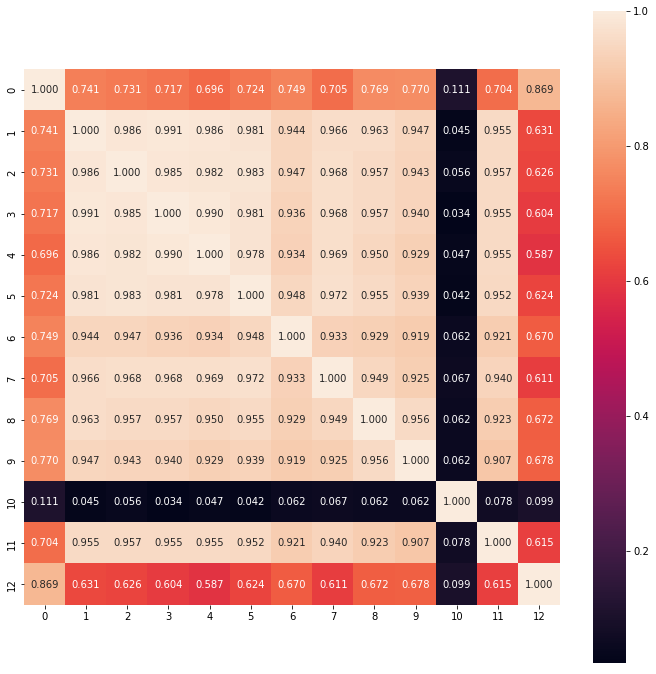

In [30]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df, annot=True, fmt='.3f', square=True, ax=ax,
           xticklabels=list_label,
           yticklabels=list_label)
ax.set_ylim(13, 0)
plt.yticks(va="center")
plt.show()

### 正規化、標準化してみた

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

まずは,**正規化**を行ってみみる

In [18]:
ms = MinMaxScaler()
mms = ms.fit_transform(vectors)
print(mms)

[[0.  0.  1.  ... 0.  0.  0. ]
 [0.5 0.8 1.  ... 0.  0.  0. ]
 [1.  0.8 1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.4 1.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]]


In [24]:
cosin = cos_sim(mms)
cosin = np.round(cosin,3)
dfmms = pd.DataFrame(cosin,list_label)
dfmms

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,0.260,0.210,0.230,0.267,0.249,0.253,0.255,0.252,0.242,0.039,0.264,0.343
1,0.260,1.000,0.240,0.270,0.290,0.272,0.265,0.254,0.249,0.221,0.025,0.234,0.235
2,0.210,0.240,1.000,0.234,0.248,0.238,0.219,0.220,0.216,0.194,0.012,0.225,0.195
3,0.230,0.270,0.234,1.000,0.307,0.263,0.256,0.261,0.255,0.224,0.025,0.245,0.204
4,0.267,0.290,0.248,0.307,1.000,0.302,0.289,0.262,0.282,0.242,0.012,0.275,0.235
5,0.249,0.272,0.238,0.263,0.302,1.000,0.286,0.287,0.284,0.240,0.013,0.244,0.235
6,0.253,0.265,0.219,0.256,0.289,0.286,1.000,0.297,0.278,0.243,0.016,0.253,0.251
7,0.255,0.254,0.220,0.261,0.262,0.287,0.297,1.000,0.286,0.253,0.017,0.253,0.257
8,0.252,0.249,0.216,0.255,0.282,0.284,0.278,0.286,1.000,0.304,0.029,0.252,0.258
9,0.242,0.221,0.194,0.224,0.242,0.240,0.243,0.253,0.304,1.000,0.019,0.227,0.240


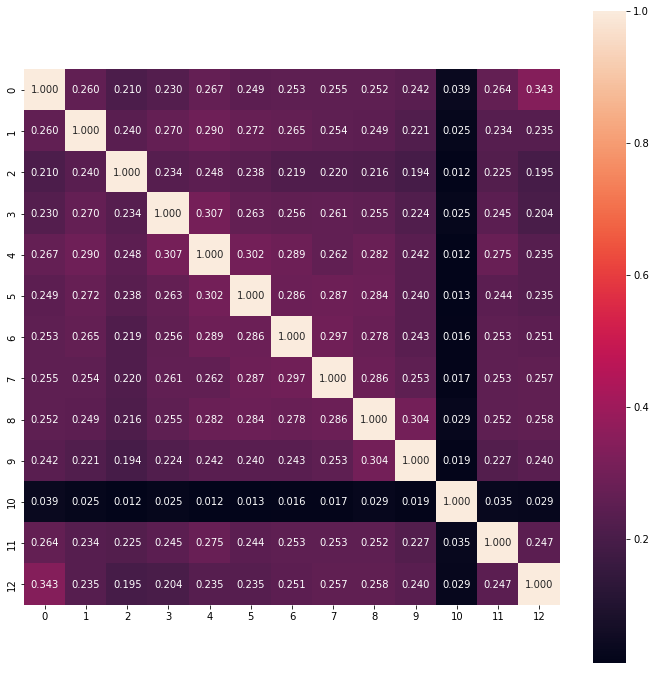

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dfmms, annot=True, fmt='.3f', square=True, ax=ax,
           xticklabels=list_label,
           yticklabels=list_label)
ax.set_ylim(13, 0)
plt.yticks(va="center")
plt.show()

結果としては、**極端に悪くなった**

In [21]:
ss = StandardScaler()
sslist = ss.fit_transform(vectors)
print(sslist)

[[-0.40089186 -0.86363636  0.28867513 ... -0.28867513 -0.28867513
  -0.28867513]
 [ 1.33630621  1.5         0.28867513 ... -0.28867513 -0.28867513
  -0.28867513]
 [ 3.07350428  1.5         0.28867513 ... -0.28867513 -0.28867513
  -0.28867513]
 ...
 [-0.40089186 -0.86363636 -3.46410162 ... -0.28867513 -0.28867513
  -0.28867513]
 [-0.40089186  0.31818182  0.28867513 ... -0.28867513 -0.28867513
  -0.28867513]
 [-0.40089186 -0.86363636  0.28867513 ... -0.28867513 -0.28867513
  -0.28867513]]


In [33]:
cosin = cos_sim(sslist)
cosin = np.round(cosin,3)
dfss = pd.DataFrame(cosin,list_label)
dfss

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,-0.078,-0.133,-0.147,-0.108,-0.099,-0.085,-0.035,-0.072,-0.048,0.174,-0.066,0.146
1,-0.078,1.000,-0.091,-0.083,-0.070,-0.086,-0.086,-0.097,-0.106,-0.110,-0.097,-0.113,-0.095
2,-0.133,-0.091,1.000,-0.097,-0.096,-0.102,-0.122,-0.127,-0.127,-0.128,-0.139,-0.102,-0.140
3,-0.147,-0.083,-0.097,1.000,-0.053,-0.100,-0.106,-0.109,-0.111,-0.123,-0.183,-0.105,-0.170
4,-0.108,-0.070,-0.096,-0.053,1.000,-0.068,-0.076,-0.112,-0.092,-0.112,-0.163,-0.082,-0.137
5,-0.099,-0.086,-0.102,-0.100,-0.068,1.000,-0.067,-0.060,-0.075,-0.093,-0.093,-0.106,-0.098
6,-0.085,-0.086,-0.122,-0.106,-0.076,-0.067,1.000,-0.047,-0.076,-0.092,-0.083,-0.096,-0.074
7,-0.035,-0.097,-0.127,-0.109,-0.112,-0.060,-0.047,1.000,-0.053,-0.056,0.044,-0.091,-0.010
8,-0.072,-0.106,-0.127,-0.111,-0.092,-0.075,-0.076,-0.053,1.000,-0.016,-0.041,-0.098,-0.047
9,-0.048,-0.110,-0.128,-0.123,-0.112,-0.093,-0.092,-0.056,-0.016,1.000,0.008,-0.098,-0.027


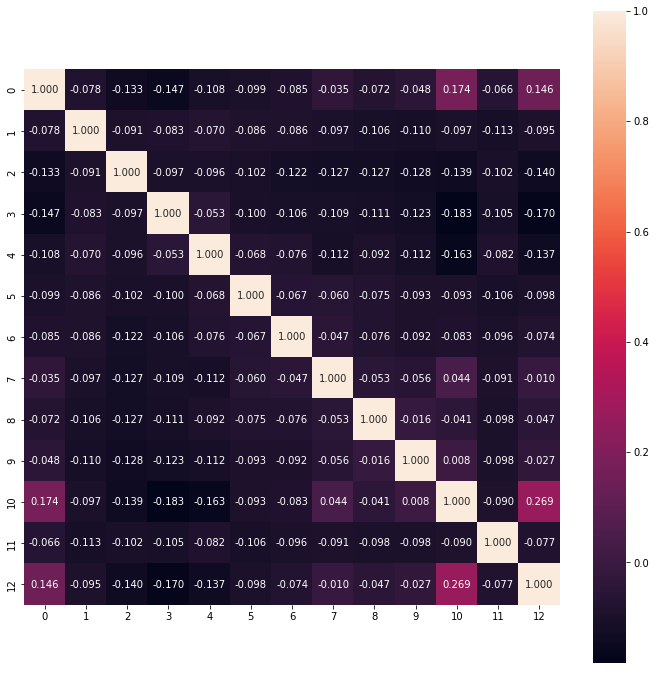

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dfss, annot=True, fmt='.3f', square=True, ax=ax,
           xticklabels=list_label,
           yticklabels=list_label)
ax.set_ylim(13, 0)
plt.yticks(va="center")
plt.show()